In [1]:
from rasterstats import zonal_stats, gen_zonal_stats
import matplotlib.pyplot as plt
import geopandas as gpd

In [2]:
help(gen_zonal_stats)

Help on function gen_zonal_stats in module rasterstats.main:

gen_zonal_stats(vectors, raster, layer=0, band=1, nodata=None, affine=None, stats=None, all_touched=False, categorical=False, category_map=None, add_stats=None, zone_func=None, raster_out=False, prefix=None, geojson_out=False, boundless=True, **kwargs)
    Zonal statistics of raster values aggregated to vector geometries.
    
    Parameters
    ----------
    vectors: path to an vector source or geo-like python objects
    
    raster: ndarray or path to a GDAL raster source
        If ndarray is passed, the ``affine`` kwarg is required.
    
    layer: int or string, optional
        If `vectors` is a path to a fiona source,
        specify the vector layer to use either by name or number.
        defaults to 0
    
    band: int, optional
        If `raster` is a GDAL source, the band number to use (counting from 1).
        defaults to 1.
    
    nodata: float, optional
        If `raster` is a GDAL source, this value o

In [3]:
gdf = gpd.read_file("../../data/vectors/amazonia_grid.zip")
gdf

,cell,e_rivers,e_urban100,id,nome,sigla,regiao_id,codigo_ibg,geometry
0,https://purl.org/dbcells/epsg4326#R0_0830Cx-56...,1777.524580,164136.122159,3,Amazonas,AM,3,13,"POLYGON ((4758968.119 9768024.588, 4758959.715..."
1,https://purl.org/dbcells/epsg4326#R0_0830Cx-56...,3628.358284,161992.829037,3,Amazonas,AM,3,13,"POLYGON ((4762068.947 9768028.795, 4761776.758..."
2,https://purl.org/dbcells/epsg4326#R0_0830Cx-56...,378.771997,173107.116228,3,Amazonas,AM,3,13,"POLYGON ((4758968.119 9768024.588, 4749697.672..."
3,https://purl.org/dbcells/epsg4326#R0_0830Cx-56...,3791.610418,171075.670935,3,Amazonas,AM,3,13,"POLYGON ((4758968.119 9768024.588, 4758975.150..."
4,https://purl.org/dbcells/epsg4326#R0_0830Cx-56...,3129.890731,169521.668491,3,Amazonas,AM,3,13,"POLYGON ((4755097.895 9758797.630, 4753073.894..."
...,...,...,...,...,...,...,...,...,...
18937,https://purl.org/dbcells/epsg4326#R0_0830Cx-73...,133.422953,731267.517092,3,Amazonas,AM,3,13,"POLYGON ((2827623.774 9178968.901, 2828027.298..."
18938,https://purl.org/dbcells/epsg4326#R0_0830Cx-73...,4301.511528,726837.164638,3,Amazonas,AM,3,13,"POLYGON ((2828027.298 9169223.143, 2828417.641..."
18939,https://purl.org/dbcells/epsg4326#R0_0830Cx-73...,4563.802982,743937.341016,3,Amazonas,AM,3,13,"POLYGON ((2818110.219 9186224.890, 2817714.450..."
18940,https://purl.org/dbcells/epsg4326#R0_0830Cx-73...,2920.221985,739454.813365,3,Amazonas,AM,3,13,"POLYGON ((2818829.576 9168832.056, 2814297.128..."


In [4]:
import rioxarray


ModuleNotFoundError: No module named 'rioxarray'

In [36]:
surface = rioxarray.open_rasterio('zip://../data/tiffs/amazoniaveg.zip')

In [37]:
surface

<xarray.DataArray (band: 1, y: 160, x: 229)> Size: 293kB
[36640 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 2kB 2.824e+06 2.833e+06 ... 4.749e+06 4.758e+06
  * y            (y) float64 1kB 1.025e+07 1.024e+07 ... 8.909e+06 8.901e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     9.969209968386869e+36
    scale_factor:   1.0
    add_offset:     0.0

Axes(0.292452,0.11;0.440096x0.77)


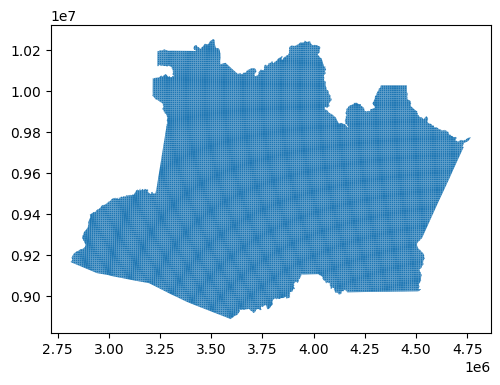

In [5]:
import pandas as pd
import matplotlib.pyplot as plt



# Cria uma figura e uma grade de subplots (1 linha, 2 colunas)
fig, axs = plt.subplots(1, figsize=(10, 4))

aa = gdf.plot(ax=axs)

print (aa)


In [8]:
import time

In [10]:
inicio = time.time()
stats = zonal_stats (gdf, "zip://../data/rasters/amazoniaveg.zip", stats="mean")
fim = time.time()

# Calcula e imprime o tempo de execução
tempo_execucao = fim - inicio
print(f'Tempo de execução: {tempo_execucao} segundos')

Tempo de execução: 116.39122653007507 segundos


In [ ]:
[f['mean'] for f in stats]

[None,
 None,
 None,
 0.0,
 None,
 None,
 0.0,
 0.0,
 None,
 0.0,
 None,
 None,
 None,
 None,
 0.0,
 0.0,
 0.0,
 0.00875,
 0.516875,
 None,
 None,
 0.0,
 0.0,
 0.0,
 0.0,
 0.00875,
 0.046875,
 0.2503125,
 None,
 None,
 0.03625,
 0.0,
 0.0,
 0.0,
 0.008125,
 0.08125,
 0.24828124999999998,
 0.4153125,
 0.5321875,
 0.4496875,
 None,
 None,
 None,
 None,
 0.0846875,
 0.0096875,
 0.0,
 0.0,
 0.0125,
 0.06375,
 0.150625,
 0.2375,
 0.19624999999999998,
 0.2109375,
 0.68,
 0.8746875000000001,
 None,
 None,
 0.29,
 0.146875,
 0.133125,
 0.019375,
 0.0,
 0.0,
 0.0175,
 0.011875,
 0.055,
 0.098125,
 0.1025,
 0.115625,
 0.413125,
 0.756875,
 0.819375,
 None,
 None,
 None,
 0.29,
 0.146875,
 0.14,
 0.019375,
 0.0,
 0.0,
 0.0175,
 0.011875,
 0.055,
 0.098125,
 0.1025,
 0.115625,
 0.413125,
 0.756875,
 0.819375,
 0.965,
 0.841875,
 None,
 None,
 None,
 None,
 0.53,
 0.655625,
 0.6475,
 0.018125,
 0.02,
 0.0,
 0.054375,
 0.0125,
 0.13749999999999998,
 0.2625,
 0.27875,
 0.66,
 0.193125,
 0.784375,
 0.

In [11]:
gdf["mean_value"] = [feature["mean"] for feature in stats]

<Axes: >

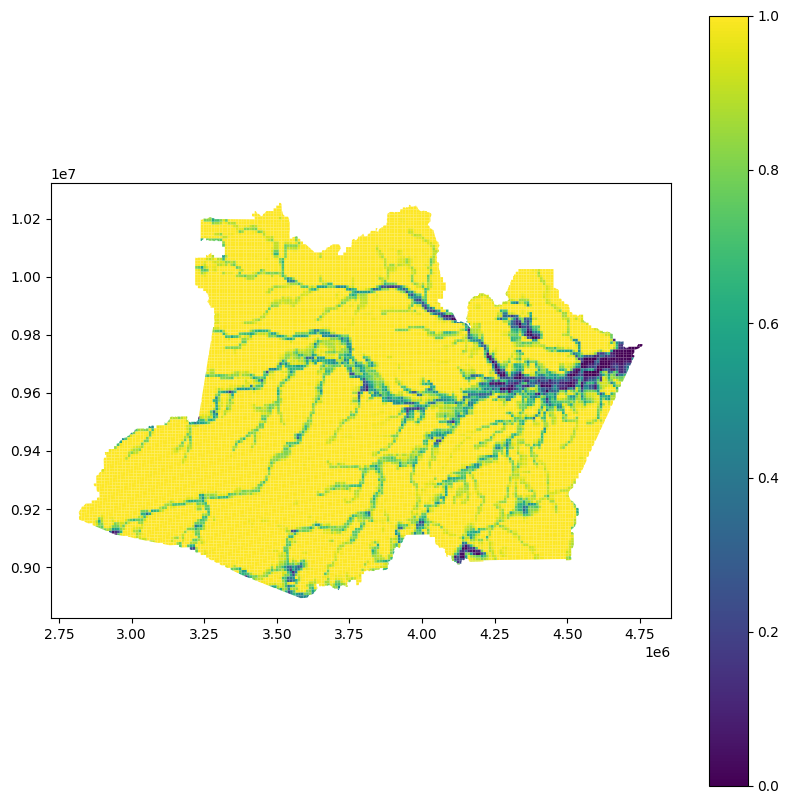

In [12]:
gdf.plot(column='mean_value', cmap='viridis', legend=True, figsize=(10, 10))

In [ ]:
#gdf.to_file('saida.shp') ## salvando

In [31]:
stats

[{'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': 0.0},
 {'mean': None},
 {'mean': None},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': None},
 {'mean': 0.0},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.00875},
 {'mean': 0.516875},
 {'mean': None},
 {'mean': None},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.00875},
 {'mean': 0.046875},
 {'mean': 0.2503125},
 {'mean': None},
 {'mean': None},
 {'mean': 0.03625},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.008125},
 {'mean': 0.08125},
 {'mean': 0.24828124999999998},
 {'mean': 0.4153125},
 {'mean': 0.5321875},
 {'mean': 0.4496875},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': None},
 {'mean': 0.0846875},
 {'mean': 0.0096875},
 {'mean': 0.0},
 {'mean': 0.0},
 {'mean': 0.0125},
 {'mean': 0.06375},
 {'mean': 0.150625},
 {'mean': 0.2375},
 {'mean': 0.19624999999999998},
 {'mean': 0.2109375}

# Calculando centroides

In [41]:
gt_polygons = gpd.read_file("../data/vectors/countries_clean.gpkg")
gt_polygons

,ADMIN,geometry
0,Indonesia,"MULTIPOLYGON (((13102705.696 463877.598, 13102..."
1,Malaysia,"MULTIPOLYGON (((13102705.696 463877.598, 13101..."
2,Chile,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."
3,Bolivia,"POLYGON ((-7737827.685 -1979875.500, -7737828...."
4,Peru,"MULTIPOLYGON (((-7737827.685 -1979875.500, -77..."
...,...,...
155,Taiwan,"MULTIPOLYGON (((13570488.501 2869616.777, 1356..."
156,Japan,"MULTIPOLYGON (((14447401.267 3737037.331, 1444..."
157,Iceland,"MULTIPOLYGON (((-1621215.732 9982883.495, -162..."
158,Solomon Islands,"MULTIPOLYGON (((17867187.118 -1315679.987, 178..."


In [42]:
gt_polygons["centroid"] = gt_polygons.geometry.centroid

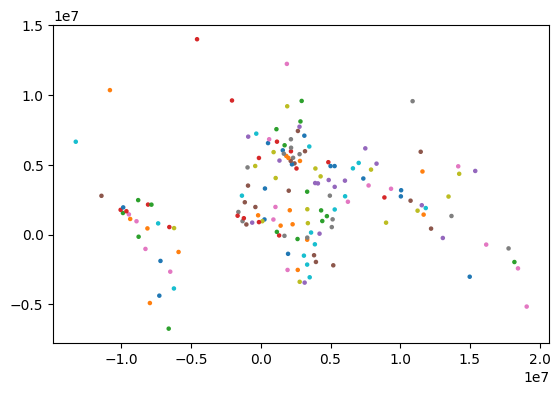

In [43]:
ax = gt_polygons.set_geometry("centroid").plot("ADMIN", markersize=5)

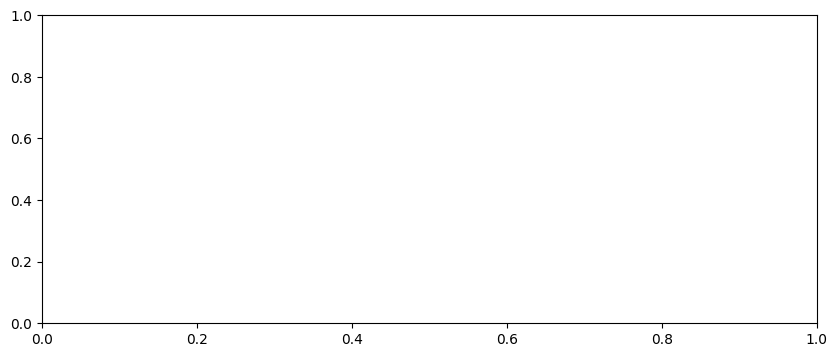

In [50]:

# Cria uma figura e uma grade de subplots (1 linha, 2 colunas)
fig, ax = plt.subplots(1, figsize=(10, 4))

In [53]:

aa = gt_polygons.plot(ax=ax)


<Figure size 640x480 with 0 Axes>

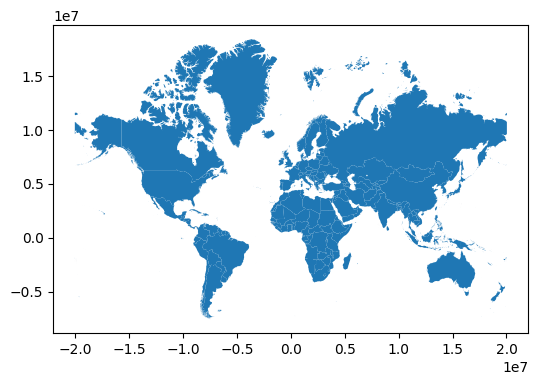

In [54]:
fig, ax = plt.subplots(1, figsize=(10, 4))
aa = gt_polygons.plot(ax=ax)
